In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as image
import urllib.request
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


%matplotlib inline

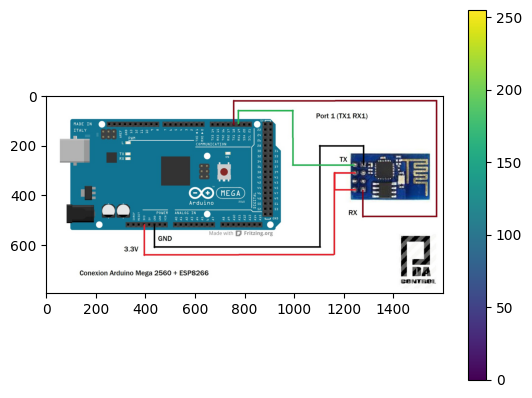

In [3]:
img = np.asarray(Image.open("./upload/b43IC.jpg"))

# reshape the image to a 2D array for further process.
plt.imshow(img)
plt.colorbar()
plt.show()

In [5]:
shape = img.shape
img_2d = img.reshape(shape[0] * shape[1], shape[2])
img_2d


array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

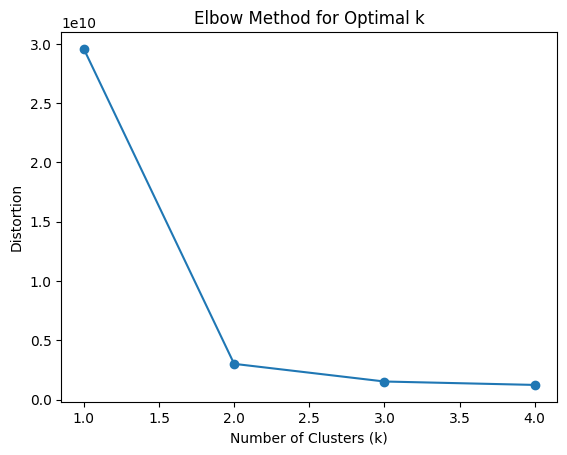

In [6]:
# find the optimal k value
distortions = []
K_range = range(1, 5)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=1)
    kmeans.fit(img_2d)
    distortions.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(K_range, distortions, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distortion")
plt.title("Elbow Method for Optimal k")
plt.show()

In [12]:

"""Takes 2D image array and the number of clusters to be created."""
model = KMeans(n_clusters=2, n_init=1)
model.fit(img_2d)
model

KMeans(n_clusters=2, n_init=1)

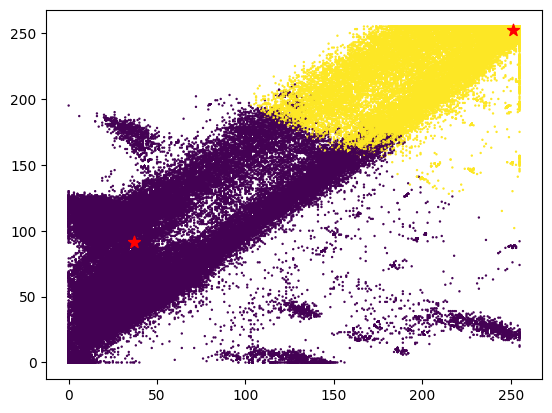

In [13]:
plt.scatter(img_2d[:, 0], img_2d[:, 1], c=model.labels_, s=0.5)
plt.scatter(
    model.cluster_centers_[:, 0],
    model.cluster_centers_[:, 1],
    marker="*",
    s=80,
    c="r",
)
plt.show()

In [14]:
def rgb_to_hex(_model):
    """convert image dominate colors to hex value"""

    _colors = []

    for i, color in enumerate(_model.cluster_centers_.round().astype(int)):
        _hex = ("{:02X}" * 3).format(color[0], color[1], color[2])
        _colors.append(f"#{_hex}")

    return {
        "hex_colors": _colors,
        "label_count": pd.DataFrame(_model.labels_).value_counts(),
    }
rgb_to_hex(model)

{'hex_colors': ['#255C71', '#FBFCFC'],
 'label_count': 1    819057
 0    452943
 dtype: int64}

In [15]:
colors = rgb_to_hex(model)

hex_colors = colors["hex_colors"]
counts = colors["label_count"]
hex_colors

['#255C71', '#FBFCFC']

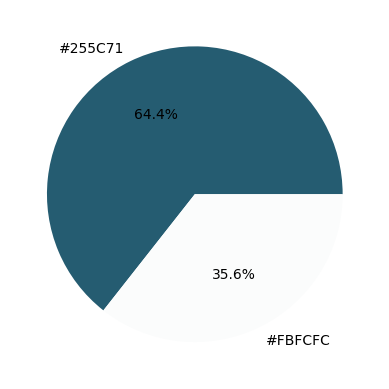

In [16]:
plt.pie(counts, labels=hex_colors, colors=hex_colors, autopct="%1.1f%%")
plt.savefig("color_pi_charttest.svg")
plt.show()